In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Credit Card Default II (balance).csv")

In [3]:
df.describe()
df.sort_values('age')
# There are negative age values input.
# Invalid values that suggest true value: In other cases, the value will be invalid, but may suggest the true value. 
# For example, I have a value of -52, -36  for age which might suggest that the minus sign was a typo. As such, I will use
# the abs() method to change all values to positive

,income,age,loan,default
21,32197.62070,-52.423280,4244.057136,0
26,63287.03891,-36.496976,9595.286289,0
15,50501.72669,-28.218361,3977.287432,0
1749,67119.13596,18.055189,2725.240313,0
1680,29856.48632,18.055874,4731.816864,1
...,...,...,...,...
931,45783.15475,63.885044,7492.909820,0
1848,40522.82828,63.887141,7720.780489,0
401,62553.66841,63.924976,4641.704785,0
939,29178.97759,63.930735,1664.386062,0


In [4]:
df['age'] = abs(df['age'])


In [5]:
df = df.dropna()
df

,income,age,loan,default
0,66155.925100,59.017015,8106.532131,0
1,34415.153970,48.117153,6564.745018,0
2,57317.170060,63.108049,8020.953296,0
3,42709.534200,45.751972,6103.642260,0
4,66952.688850,18.584336,8770.099235,1
...,...,...,...,...
3423,60903.191726,21.933924,10367.081892,1
3424,62235.644695,25.033016,8083.900063,1
3425,25597.850590,26.350344,3810.110335,1
3426,48164.194974,23.141976,6529.652892,1


In [6]:
# Normalization using min max scaler. All values will be in the range of [0,1]. 
# This is done because values like income or loan are way larger as compared to other values like age

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
# names = ['income', 'age', 'loan']
names = df.columns
print(names)
d = scaler.fit_transform(df)
df = pd.DataFrame(d, columns=names)
df.head()

Index(['income', 'age', 'loan', 'default'], dtype='object')


,income,age,loan,default
0,0.923176,0.892092,0.588837,0.0
1,0.288122,0.654708,0.476827,0.0
2,0.746334,0.981189,0.582620,0.0
3,0.454072,0.603198,0.443328,0.0
4,0.939117,0.011524,0.637045,1.0


In [7]:
# # Normalization
# from scipy import stats
# import numpy as np 
# df["income"]  =stats.zscore(df["income"].astype(np.float))
# df["age"]  =stats.zscore(df["age"].astype(np.float))
# df["loan"]  =stats.zscore(df["loan"].astype(np.float))
# df


In [8]:
import random

Y = df.iloc[:, 3]
X = df.iloc[:, 0:3]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=2)
print(X_train, X_test, Y_train, Y_test)


        income       age      loan
2993  0.978559  0.221608  0.715273
647   0.006642  0.384630  0.047561
194   0.300726  0.230812  0.172986
1485  0.059880  0.673337  0.166762
501   0.311392  0.530079  0.264407
...        ...       ...       ...
2347  0.371256  0.065793  0.408535
1608  0.850177  0.215648  0.478718
2541  0.534627  0.058659  0.505636
2575  0.566424  0.241289  0.562184
3240  0.086207  0.172278  0.303668

[2399 rows x 3 columns]         income       age      loan
3383  0.116318  0.081215  0.266078
158   0.844963  0.283703  0.029448
95    0.671999  0.047596  0.697437
3371  0.308392  0.215343  0.491038
663   0.150187  0.370920  0.196043
...        ...       ...       ...
1864  0.294280  0.090778  0.295832
3326  0.751524  0.342569  0.715977
2164  0.002997  0.190061  0.191426
2745  0.767857  0.169338  0.685607
1208  0.369396  0.202348  0.020938

[1029 rows x 3 columns] 2993    1.0
647     0.0
194     0.0
1485    0.0
501     0.0
       ... 
2347    1.0
1608    0.0
2541    1.0
25

Linear Regression

[[1096  113]
 [   8 1182]]
0.9495623176323468


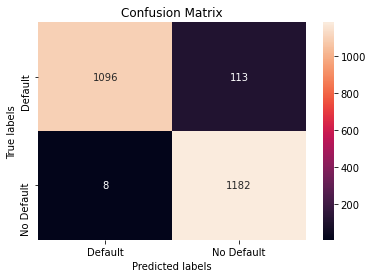

In [9]:
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt     

model_log = linear_model.LogisticRegression()
model_log.fit(X_train, Y_train)

# Accuracy for trainset

THRESHOLD = 0.5
pred = model_log.predict_proba(X_train)
# [:,1] taking all rows (:) but keeping the second column (1) proba return 2 columns
pred = np.where(pred[:,1] > THRESHOLD, 1, 0)
cm = confusion_matrix(Y_train, pred)


ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Default', 'No Default']); ax.yaxis.set_ticklabels(['Default', 'No Default']);
print(cm)
accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))
print(accuracy)



In [10]:
# Accuracy for test cases

pred = model_log.predict_proba(X_test)
# [:,1] taking all rows (:) but keeping the second column (1) proba return 2 columns
pred = np.where(pred[:,1] > THRESHOLD, 1, 0)
cm = confusion_matrix(Y_test, pred)
print(cm)
accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))
print(accuracy)


[[454  51]
 [  5 519]]
0.9455782312925171


Decision Tree Clasifier

In [11]:
# Without optimized parameters (Scroll down below to find the optimized parameters)

from sklearn import tree
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(X_train, Y_train)
pred = model_tree.predict(X_test)

cm = confusion_matrix(Y_test,pred)
print(cm)
print((cm[0,0] + cm[1,1])/sum(sum(cm)))

[[496   9]
 [  2 522]]
0.989310009718173


In [12]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_train, Y_train) #splitting it into a validation set to create unseen cases for the model to train again and optimise. If we use the same train set to do optimisation then when we put it back into the main model, wil have overfitting

In [13]:
# Using brute force to find the optimum max_depth and min_samples_split
for i in range(20):
    model = tree.DecisionTreeClassifier(max_depth = i+1)
    model.fit(X_train1, Y_train1)
    pred = model.predict(X_test1)
    cm = confusion_matrix(Y_test1, pred)
    print(i+1)
    print((cm[0,0] + cm[1,1])/sum(sum(cm)))
    print("==========")

    #max_depth = 10 before accuracy drops

1
0.88
2
0.9366666666666666
3
0.9366666666666666
4
0.9666666666666667
5
0.975
6
0.985
7
0.9883333333333333
8
0.9883333333333333
9
0.99
10
0.99
11
0.9866666666666667
12
0.9866666666666667
13
0.99
14
0.99
15
0.99
16
0.9866666666666667
17
0.9933333333333333
18
0.9883333333333333
19
0.9883333333333333
20
0.99


In [14]:
for i in range(50):
    model = tree.DecisionTreeClassifier(min_samples_split = i+5)
    model.fit(X_train1, Y_train1)
    pred = model.predict(X_test1)
    cm = confusion_matrix(Y_test1, pred)
    print(i+1)
    print((cm[0,0] + cm[1,1])/sum(sum(cm)))
    print("==========")

#min_samples_split is 7

1
0.99
2
0.9933333333333333
3
0.9933333333333333
4
0.99
5
0.99
6
0.9866666666666667
7
0.9866666666666667
8
0.99
9
0.99
10
0.9883333333333333
11
0.985
12
0.985
13
0.9816666666666667
14
0.9816666666666667
15
0.9816666666666667
16
0.9816666666666667
17
0.98
18
0.98
19
0.98
20
0.98
21
0.98
22
0.98
23
0.9766666666666667
24
0.9766666666666667
25
0.9766666666666667
26
0.9766666666666667
27
0.9766666666666667
28
0.9766666666666667
29
0.9766666666666667
30
0.9766666666666667
31
0.9766666666666667
32
0.9766666666666667
33
0.9766666666666667
34
0.9766666666666667
35
0.9766666666666667
36
0.9766666666666667
37
0.9766666666666667
38
0.9766666666666667
39
0.9766666666666667
40
0.9766666666666667
41
0.9766666666666667
42
0.9766666666666667
43
0.9766666666666667
44
0.9766666666666667
45
0.9766666666666667
46
0.9766666666666667
47
0.9766666666666667
48
0.9766666666666667
49
0.9766666666666667
50
0.9766666666666667


In [15]:
# Using GridSearchCV to find max_depth and min_samples_split
from sklearn.model_selection import GridSearchCV
model = tree.DecisionTreeClassifier()
g = GridSearchCV(estimator = model, param_grid = dict(max_depth = [i for i in range(1,20)], min_samples_split = [i for i in range(1,50)])) #can actually optimise max_depth and min_samples_spli

In [16]:
g = g.fit(X_train,Y_train)

C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\jethr\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\jethr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

In [17]:
print(g.best_params_)
min_ss = g.best_params_['min_samples_split']
max_d = g.best_params_['max_depth']

{'max_depth': 9, 'min_samples_split': 4}


In [18]:
# Using gridSearch params to find optimized parameters max_depth and min_samples_split to fit into the new model

# Accuracy for trainset
model_tree = tree.DecisionTreeClassifier(max_depth= max_d, min_samples_split= min_ss)
model_tree.fit(X_train, Y_train)
pred = model_tree.predict(X_train)

cm = confusion_matrix(Y_train,pred)
print(cm)
print((cm[0,0] + cm[1,1])/sum(sum(cm)))

# Accuracy for trainset is 1.0 for decision tree

[[1207    2]
 [   3 1187]]
0.9979157982492706


In [19]:
# Accuracy for test cases
pred = model_tree.predict(X_test)

# In order of feature importance: age, loan, income 
print(model_tree.feature_importances_)

cm = confusion_matrix(Y_test,pred)
print(cm)
print((cm[0,0] + cm[1,1])/sum(sum(cm)))

[0.14442712 0.58862551 0.26694738]
[[497   8]
 [  3 521]]
0.989310009718173


Random Forest Classifier

In [20]:
# When I removed max_depth = 3, I got an accuracy of 1.0. This suggest overfitting. As such, I will be using a max_depth of 3 to prevent overfitting.

# Accuracy for trainset

from sklearn import ensemble
model_Rforest = ensemble.RandomForestClassifier(max_depth = 3)
model_Rforest.fit(X_train, Y_train)
pred = model_Rforest.predict(X_train)
cm = confusion_matrix(Y_train, pred)
print(cm)
print((cm[0,0] + cm[1,1])/sum(sum(cm)))


[[1083  126]
 [   1 1189]]
0.9470612755314715


In [21]:
# Accuracy for test cases

pred = model_Rforest.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print(cm)
print((cm[0,0] + cm[1,1])/sum(sum(cm)))

[[450  55]
 [  0 524]]
0.9465500485908649


XGBoost

In [22]:
# Using GridSearchCV to find max_depth for XGBoost

from sklearn.model_selection import GridSearchCV
model = ensemble.GradientBoostingClassifier()
g = GridSearchCV(estimator = model, param_grid = dict(max_depth = [i for i in range(1,20)])) #can actually optimise max_depth and min_samples_
g = g.fit(X_train,Y_train)
print(g.best_params_)
max_d = g.best_params_['max_depth']

{'max_depth': 5}


In [23]:
# Accuracy for trainset

model_XG = ensemble.GradientBoostingClassifier(max_depth= max_d)
model_XG.fit(X_train, Y_train)
pred = model_XG.predict(X_train)
cm = confusion_matrix(Y_train, pred)
print((cm[0,0] + cm[1,1])/sum(sum(cm)))

1.0


In [24]:
# Accuracy for test cases

pred = model_XG.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print(cm)
print((cm[0,0] + cm[1,1])/sum(sum(cm)))

[[496   9]
 [  1 523]]
0.9902818270165209


Neural Network

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model_nn = Sequential()
#if number of hidden laters is small, use REllU. Theres no upper limit for rellU so more hidden layers, number might explode
# Categorical always use sigmoid

# I tried using adding another layer to the neural network but it resulted in a decrease in accuracy. As such, I kept it to having two layers as shown below.
model_nn.add(Dense(10, input_dim = 3, activation = "relu")) #rellU00, make negative number close to 0 then the +ve number make it linear. Prevent overfitting of values 

# Dropout is a technique used to prevent a model from overfitting. ... Dropout works by randomly setting the outgoing edges of hidden units (neurons that make up hidden layers) to 0 at each update of the training phase.2
model_nn.add(Dropout(0.2))
model_nn.add(Dense(1, activation="sigmoid"))
model_nn.compile(loss = "binary_crossentropy", metrics=["accuracy"])
model_nn.fit(X_train, Y_train, batch_size=10, epochs =10)



Epoch 1/10
240/240 [==============================] - 1s 871us/step - loss: 0.7041 - accuracy: 0.5059
Epoch 2/10
240/240 [==============================] - 0s 979us/step - loss: 0.6386 - accuracy: 0.6229
Epoch 3/10
240/240 [==============================] - 0s 888us/step - loss: 0.5749 - accuracy: 0.7029
Epoch 4/10
240/240 [==============================] - 0s 849us/step - loss: 0.5109 - accuracy: 0.7671
Epoch 5/10
240/240 [==============================] - 0s 934us/step - loss: 0.4599 - accuracy: 0.8026
Epoch 6/10
240/240 [==============================] - 0s 907us/step - loss: 0.4266 - accuracy: 0.8272
Epoch 7/10
240/240 [==============================] - 0s 853us/step - loss: 0.3885 - accuracy: 0.8449
Epoch 8/10
240/240 [==============================] - 0s 800us/step - loss: 0.3505 - accuracy: 0.8625
Epoch 9/10
240/240 [==============================] - 0s 877us/step - loss: 0.3317 - accuracy: 0.8710
Epoch 10/10
240/240 [==============================] - 0s 940us/step - loss: 0.299

In [26]:
model_nn.evaluate(X_test, Y_test)

33/33 [==============================] - 0s 738us/step - loss: 0.2619 - accuracy: 0.9242


[0.2618734836578369, 0.9241982698440552]

In [27]:
# Accuracy for trainset

pred = model_nn.predict(X_train)

pred = np.where(pred>0.5,1,0)
cm = confusion_matrix(Y_train,pred)
print(cm)
print((cm[0,0] + cm[1,1])/sum(sum(cm)))

[[1060  149]
 [  57 1133]]
0.9141308878699458


In [28]:
# Accuracy for test cases

pred = model_nn.predict(X_test)
pred = np.where(pred>0.5,1,0)
cm = confusion_matrix(Y_test,pred)
print(cm)
print((cm[0,0] + cm[1,1])/sum(sum(cm)))

[[444  61]
 [ 17 507]]
0.924198250728863


In [29]:
import joblib
joblib.dump(model_XG, "XGBoost")
joblib.dump(model_log, "logReg")
joblib.dump(model_tree, "decTree")
joblib.dump(model_Rforest, "ranForest")


['ranForest']

In [30]:
from keras.models import load_model
model_nn.save("neuralNetwork")

INFO:tensorflow:Assets written to: neuralNetwork\assets
